# Machine Learning Models for Energy Analytics

## Overview
This notebook implements three types of machine learning models to analyse energy consumption and CO₂ emissions:
1. **Linear Regression** - Predicting energy consumption
2. **K-Means Clustering** - Grouping countries by energy profiles
3. **Decision Tree Classification** - Classifying energy categories

## Learning Objectives
- Understand supervised vs unsupervised learning
- Implement regression, clustering, and classification models
- Evaluate model performance using appropriate metrics
- Interpret model results for business insights

## Libraries Used
- **scikit-learn**: Machine learning algorithms and tools
- **pandas/numpy**: Data manipulation
- **matplotlib/seaborn**: Visualisation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             silhouette_score, classification_report, confusion_matrix,
                             accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Data

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (46000, 16)

Columns: ['Country', 'Energy_type', 'Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Energy_category', 'Energy_balance', 'CO2_per_capita', 'Energy_efficiency', 'Decade', 'Energy_source_type']


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_category,Energy_balance,CO2_per_capita,Energy_efficiency,Decade,Energy_source_type
0,Afghanistan,coal,1980,0.002479,0.002355,NaN,13356.5,1.990283,0.0,0.0,coal,-0.000124,0.0,NaN,1980,Fossil Fuel
1,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,13356.5,1.990283,0.0,0.0,natural gas,0.060726,0.0,NaN,1980,Fossil Fuel
2,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,13356.5,1.990283,0.0,0.0,petroleum,-0.014624,0.0,NaN,1980,Fossil Fuel
3,Afghanistan,nuclear,1980,0.000000,0.000000,NaN,13356.5,1.990283,0.0,0.0,nuclear,0.000000,0.0,0.0,1980,Nuclear
4,Afghanistan,renewables_n_other,1980,0.007386,0.007386,NaN,13356.5,1.990283,0.0,0.0,renewables,0.000000,0.0,NaN,1980,Renewable


## 2. Linear Regression - Predicting Energy Consumption

### Objective
Predict energy consumption based on GDP, Population, and Year.

### Why Linear Regression?
- Simple, interpretable model
- Works well for continuous target variables
- Provides insights into feature importance through coefficients

In [4]:
# Prepare data for regression
regression_df = df[['GDP', 'Population', 'Year', 'Energy_consumption']].dropna()
print(f"Dataset size: {len(regression_df):,} records")

# Features and target
X_reg = regression_df[['GDP', 'Population', 'Year']]
y_reg = regression_df['Energy_consumption']

# Split data (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train_reg):,} samples")
print(f"Test set: {len(X_test_reg):,} samples")

Dataset size: 33,155 records

Training set: 26,524 samples
Test set: 6,631 samples


In [6]:
# Scale features (important for many ML algorithms)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)
print("✓ Features scaled using StandardScaler")
print(f"\nScaled feature means: {X_train_reg_scaled.mean(axis=0)}")
print(f"Scaled feature std devs: {X_train_reg_scaled.std(axis=0)}")

✓ Features scaled using StandardScaler

Scaled feature means: [-2.94675392e-18 -1.63410899e-17 -7.20159869e-15]
Scaled feature std devs: [1. 1. 1.]


In [7]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

print("✓ Linear Regression model trained")
print(f"\nModel intercept: {lr_model.intercept_:.6f}")
print(f"\nModel coefficients:")
for feature, coef in zip(X_reg.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")

✓ Linear Regression model trained

Model intercept: 0.486724

Model coefficients:
  GDP: 1.816633
  Population: 0.137470
  Year: -0.069418


In [8]:
# Make predictions
y_pred_train = lr_model.predict(X_train_reg_scaled)
y_pred_test = lr_model.predict(X_test_reg_scaled)

# Evaluate model
print("=" * 80)
print("LINEAR REGRESSION - MODEL PERFORMANCE")
print("=" * 80)

print("\nTraining Set:")
train_mse = mean_squared_error(y_train_reg, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_reg, y_pred_train)
train_r2 = r2_score(y_train_reg, y_pred_train)
print(f"  MSE: {train_mse:.6f}")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE: {train_mae:.6f}")
print(f"  R² Score: {train_r2:.4f}")

print("\nTest Set:")
test_mse = mean_squared_error(y_test_reg, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_reg, y_pred_test)
test_r2 = r2_score(y_test_reg, y_pred_test)
print(f"  MSE: {test_mse:.6f}")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE: {test_mae:.6f}")
print(f"  R² Score: {test_r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_reg_scaled, y_train_reg, cv=5, scoring='r2')
print(f"\n5-Fold Cross-Validation:")
print(f"  R² Scores: {cv_scores}")
print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

LINEAR REGRESSION - MODEL PERFORMANCE

Training Set:
  MSE: 3.871611
  RMSE: 1.967641
  MAE: 0.440957
  R² Score: 0.4821

Test Set:
  MSE: 3.880103
  RMSE: 1.969798
  MAE: 0.406273
  R² Score: 0.4774

5-Fold Cross-Validation:
  R² Scores: [0.45397795 0.49196105 0.43856946 0.44578579 0.52583864]
  Mean R²: 0.4712 (+/- 0.0659)


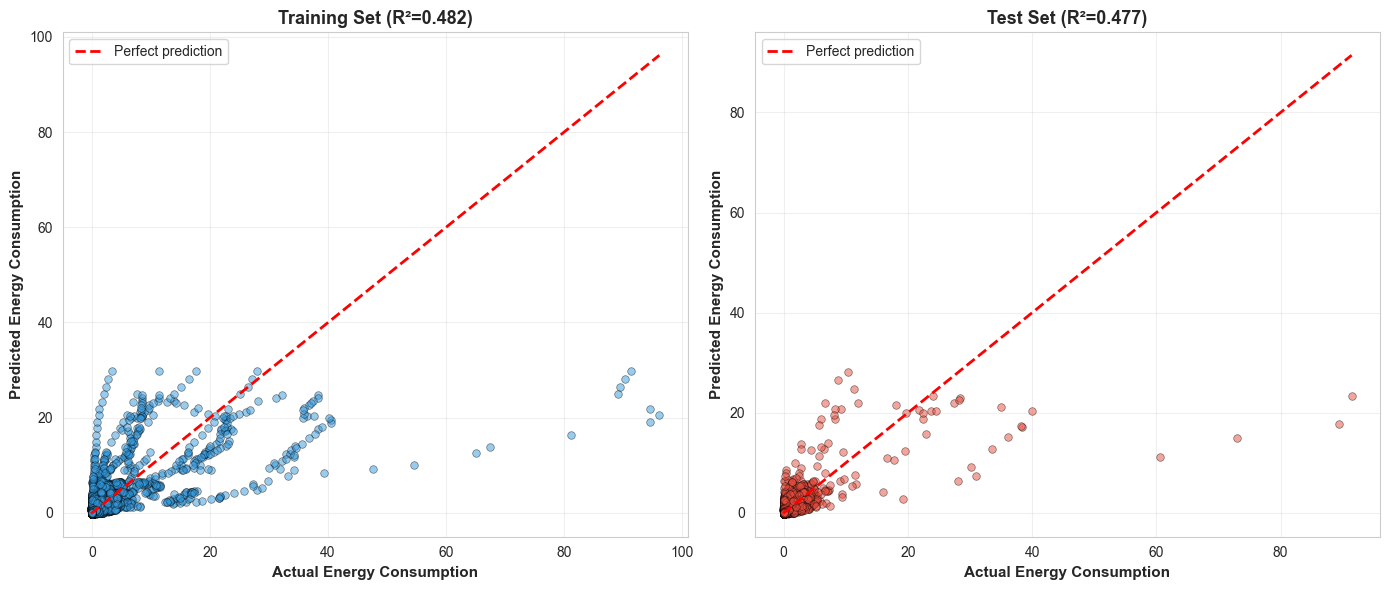


📊 Interpretation: R² of 0.477 means the model explains 47.7% of variance in energy consumption.


In [9]:
# Visualisation: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train_reg, y_pred_train, alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Energy Consumption', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Predicted Energy Consumption', fontsize=11, fontweight='bold')
axes[0].set_title(f'Training Set (R²={train_r2:.3f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test_reg, y_pred_test, alpha=0.5, s=30, color='#e74c3c', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[1].set_xlabel('Actual Energy Consumption', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Predicted Energy Consumption', fontsize=11, fontweight='bold')
axes[1].set_title(f'Test Set (R²={test_r2:.3f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Interpretation: R² of {test_r2:.3f} means the model explains {test_r2*100:.1f}% of variance in energy consumption.")

## 3. K-Means Clustering - Country Grouping

### Objective
Group countries based on their energy consumption, GDP, CO₂ emissions, and population profiles.

### Why K-Means?
- Unsupervised learning - no labels needed
- Identifies natural groupings in data
- Useful for market segmentation and pattern discovery

In [10]:
# Prepare data for clustering (aggregate by country)
cluster_df = df.groupby('Country').agg({
    'Energy_consumption': 'mean',
    'GDP': 'mean',
    'CO2_emission': 'mean',
    'Population': 'mean'
}).reset_index()

cluster_df = cluster_df.dropna()
print(f"Dataset size: {len(cluster_df)} countries")

# Features for clustering
X_cluster = cluster_df[['Energy_consumption', 'GDP', 'CO2_emission', 'Population']]

# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

Dataset size: 203 countries


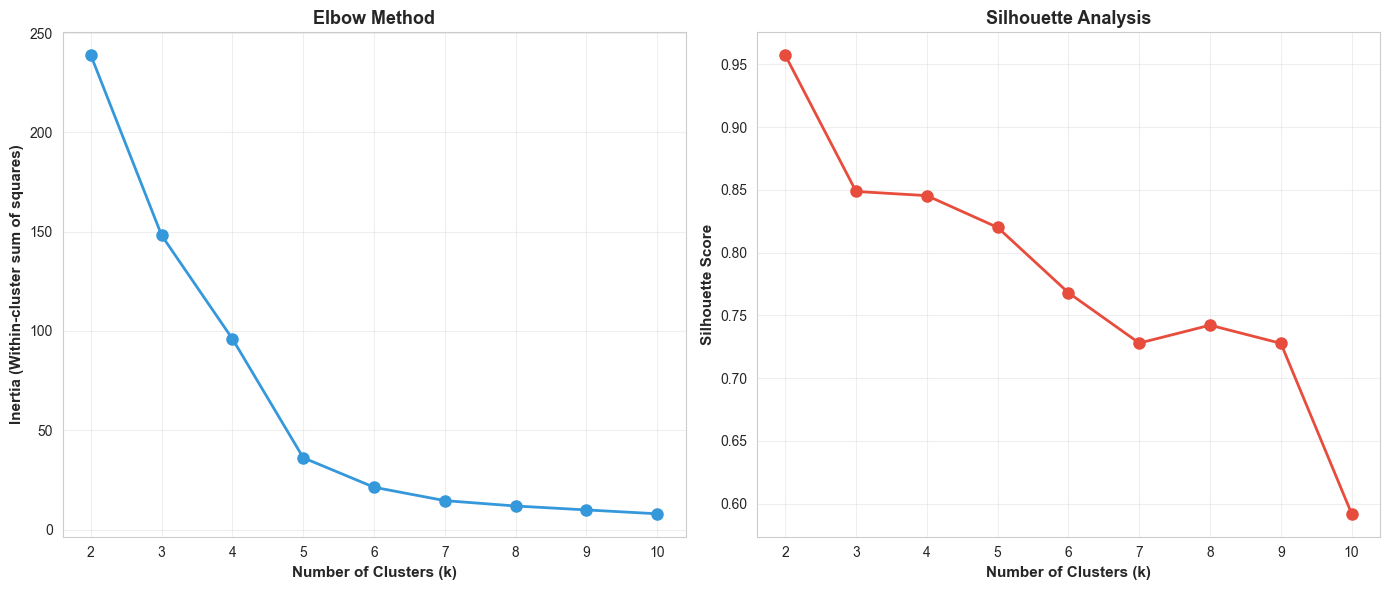


💡 Look for the 'elbow' in the first plot and the peak in the second plot to choose optimal k.


In [11]:
# Find optimal number of clusters using elbow method and silhouette analysis
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot optimization metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='#3498db')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1].set_title('Silhouette Analysis', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Look for the 'elbow' in the first plot and the peak in the second plot to choose optimal k.")

In [12]:
# Train final clustering model with optimal k
optimal_k = 4
print(f"Using k={optimal_k} clusters\n")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)
cluster_df['Cluster'] = cluster_labels

# Evaluate clustering
silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)
print("=" * 80)
print("K-MEANS CLUSTERING - MODEL PERFORMANCE")
print("=" * 80)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print(f"Inertia: {kmeans_final.inertia_:.2f}")

# Cluster statistics
print("\n" + "=" * 80)
print("CLUSTER STATISTICS")
print("=" * 80)
for i in range(optimal_k):
    cluster_data = cluster_df[cluster_df['Cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} countries):")
    print(f"  Avg Energy Consumption: {cluster_data['Energy_consumption'].mean():.4f}")
    print(f"  Avg GDP: {cluster_data['GDP'].mean():.2f}")
    print(f"  Avg CO₂ Emission: {cluster_data['CO2_emission'].mean():.4f}")
    print(f"  Avg Population: {cluster_data['Population'].mean():.2f}")
    print(f"  Sample countries: {', '.join(cluster_data['Country'].head(5).tolist())}")

Using k=4 clusters

K-MEANS CLUSTERING - MODEL PERFORMANCE

Silhouette Score: 0.8454
Inertia: 96.03

CLUSTER STATISTICS

Cluster 0 (190 countries):
  Avg Energy Consumption: 0.1283
  Avg GDP: 137.01
  Avg CO₂ Emission: 7.3421
  Avg Population: 13056.25
  Sample countries: Afghanistan, Albania, Algeria, American Samoa, Angola

Cluster 1 (1 countries):
  Avg Energy Consumption: 13.1563
  Avg GDP: 7165.17
  Avg CO₂ Emission: 988.8928
  Avg Population: 1260142.27
  Sample countries: China

Cluster 2 (1 countries):
  Avg Energy Consumption: 18.2645
  Avg GDP: 13128.25
  Avg CO₂ Emission: 1058.0193
  Avg Population: 278937.86
  Sample countries: United States

Cluster 3 (11 countries):
  Avg Energy Consumption: 2.2233
  Avg GDP: 2434.70
  Avg CO₂ Emission: 119.2659
  Avg Population: 189718.78
  Sample countries: Brazil, Canada, France, Germany, India


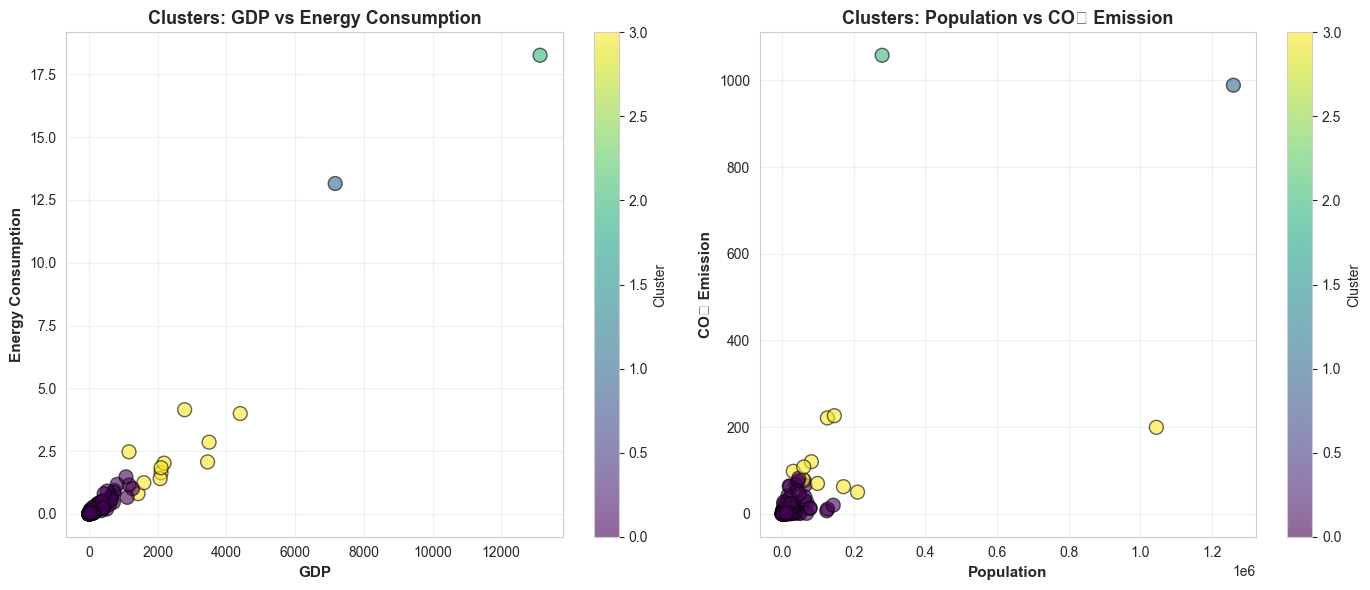

In [ ]:
# Visualise clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Energy Consumption vs GDP
scatter1 = axes[0].scatter(cluster_df['GDP'], cluster_df['Energy_consumption'], 
                           c=cluster_df['Cluster'], cmap='viridis', s=100, 
                           alpha=0.6, edgecolors='black', linewidth=1)
axes[0].set_xlabel('GDP', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Energy Consumption', fontsize=11, fontweight='bold')
axes[0].set_title('Clusters: GDP vs Energy Consumption', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# CO2 Emission vs Population
scatter2 = axes[1].scatter(cluster_df['Population'], cluster_df['CO2_emission'], 
                           c=cluster_df['Cluster'], cmap='viridis', s=100, 
                           alpha=0.6, edgecolors='black', linewidth=1)
axes[1].set_xlabel('Population', fontsize=11, fontweight='bold')
axes[1].set_ylabel('CO₂ Emission', fontsize=11, fontweight='bold')
axes[1].set_title('Clusters: Population vs CO₂ Emission', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()

## 4. Decision Tree Classification - Energy Category Prediction

### Objective
Classify energy category based on consumption, production, emissions, and GDP.

### Why Decision Trees?
- Highly interpretable (can visualise decision rules)
- Handles non-linear relationships
- No feature scaling required
- Provides feature importance rankings

In [14]:
# Prepare data for classification
classification_df = df[['Energy_consumption', 'Energy_production', 'CO2_emission', 
                         'GDP', 'Energy_category']].dropna()

# Filter to main categories
main_categories = ['renewables', 'coal', 'natural gas', 'petroleum', 'nuclear']
classification_df = classification_df[classification_df['Energy_category'].isin(main_categories)]
print(f"Dataset size: {len(classification_df):,} records")
print(f"Classes: {classification_df['Energy_category'].unique()}")

# Encode target variable
le = LabelEncoder()
y_class = le.fit_transform(classification_df['Energy_category'])
X_class = classification_df[['Energy_consumption', 'Energy_production', 'CO2_emission', 'GDP']]

# Split data (stratified to maintain class balance)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print(f"\nTraining set: {len(X_train_class):,} samples")
print(f"Test set: {len(X_test_class):,} samples")

Dataset size: 33,155 records
Classes: ['coal' 'natural gas' 'petroleum' 'nuclear' 'renewables']

Training set: 26,524 samples
Test set: 6,631 samples


In [15]:
# Scale features
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20)
dt_model.fit(X_train_class_scaled, y_train_class)

print("✓ Decision Tree model trained")
print(f"\nTree depth: {dt_model.get_depth()}")
print(f"Number of leaves: {dt_model.get_n_leaves()}")

✓ Decision Tree model trained

Tree depth: 5
Number of leaves: 32


In [16]:
# Make predictions
y_pred_train_class = dt_model.predict(X_train_class_scaled)
y_pred_test_class = dt_model.predict(X_test_class_scaled)

# Evaluate model
print("=" * 80)
print("DECISION TREE CLASSIFICATION - MODEL PERFORMANCE")
print("=" * 80)

print("\nTraining Set:")
train_accuracy = accuracy_score(y_train_class, y_pred_train_class)
print(f"  Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

print("\nTest Set:")
test_accuracy = accuracy_score(y_test_class, y_pred_test_class)
print(f"  Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Classification report
print("\n" + "=" * 80)
print("CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(y_test_class, y_pred_test_class, 
                           target_names=le.classes_, digits=4))

DECISION TREE CLASSIFICATION - MODEL PERFORMANCE

Training Set:
  Accuracy: 0.6053 (60.53%)

Test Set:
  Accuracy: 0.6093 (60.93%)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        coal     0.7296    0.3175    0.4425      1326
 natural gas     0.4947    0.0354    0.0662      1326
     nuclear     0.4649    0.8635    0.6044      1326
   petroleum     0.6031    0.9653    0.7424      1327
  renewables     0.8353    0.8643    0.8495      1326

    accuracy                         0.6093      6631
   macro avg     0.6255    0.6092    0.5410      6631
weighted avg     0.6255    0.6093    0.5410      6631




FEATURE IMPORTANCE:
           Feature  Importance
      CO2_emission    0.369135
 Energy_production    0.335036
               GDP    0.152817
Energy_consumption    0.143012


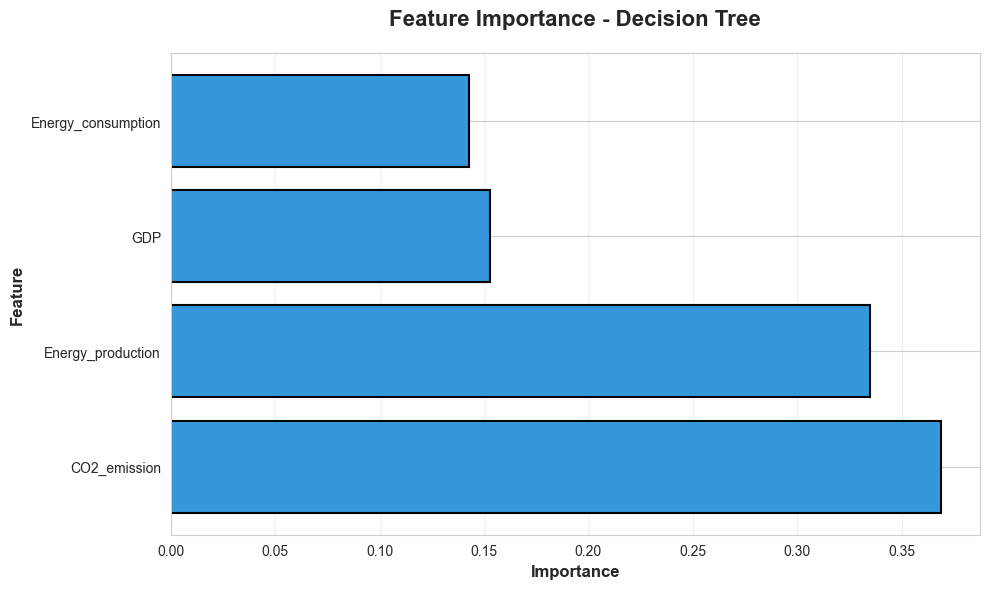

In [17]:
# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFEATURE IMPORTANCE:")
print(feature_importance_dt.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], 
         color='#3498db', edgecolor='black', linewidth=1.5)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Decision Tree', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()

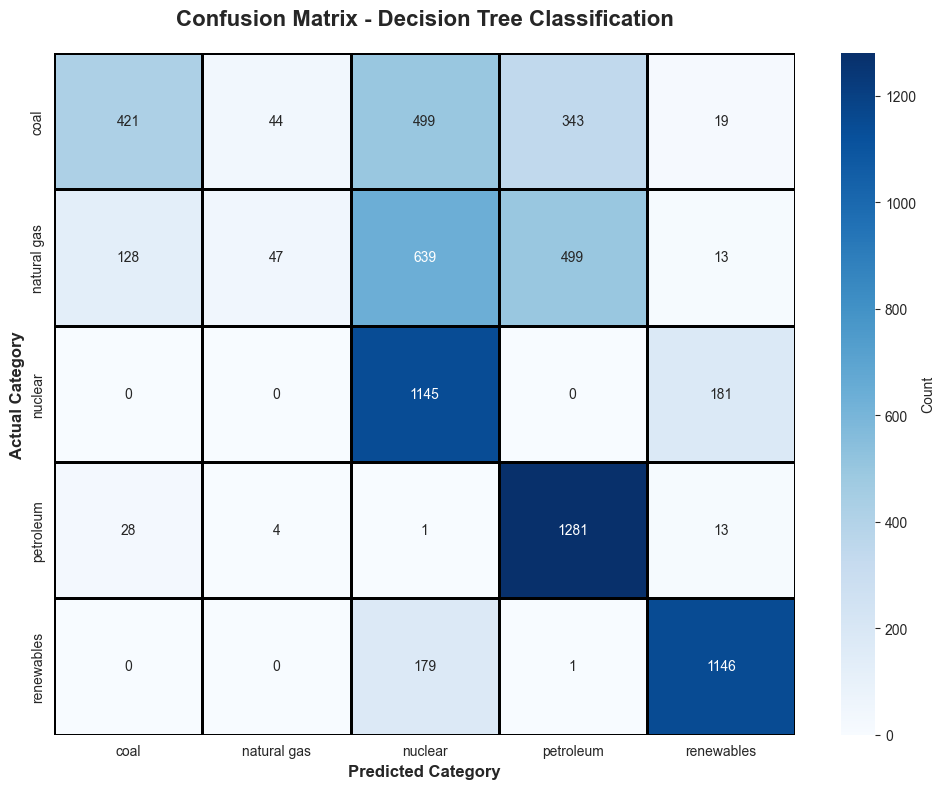


📊 Interpretation: Diagonal values show correct predictions. Off-diagonal values show misclassifications.


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_test_class)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
plt.xlabel('Predicted Category', fontsize=12, fontweight='bold')
plt.ylabel('Actual Category', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Decision Tree Classification', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Interpretation: Diagonal values show correct predictions. Off-diagonal values show misclassifications.")

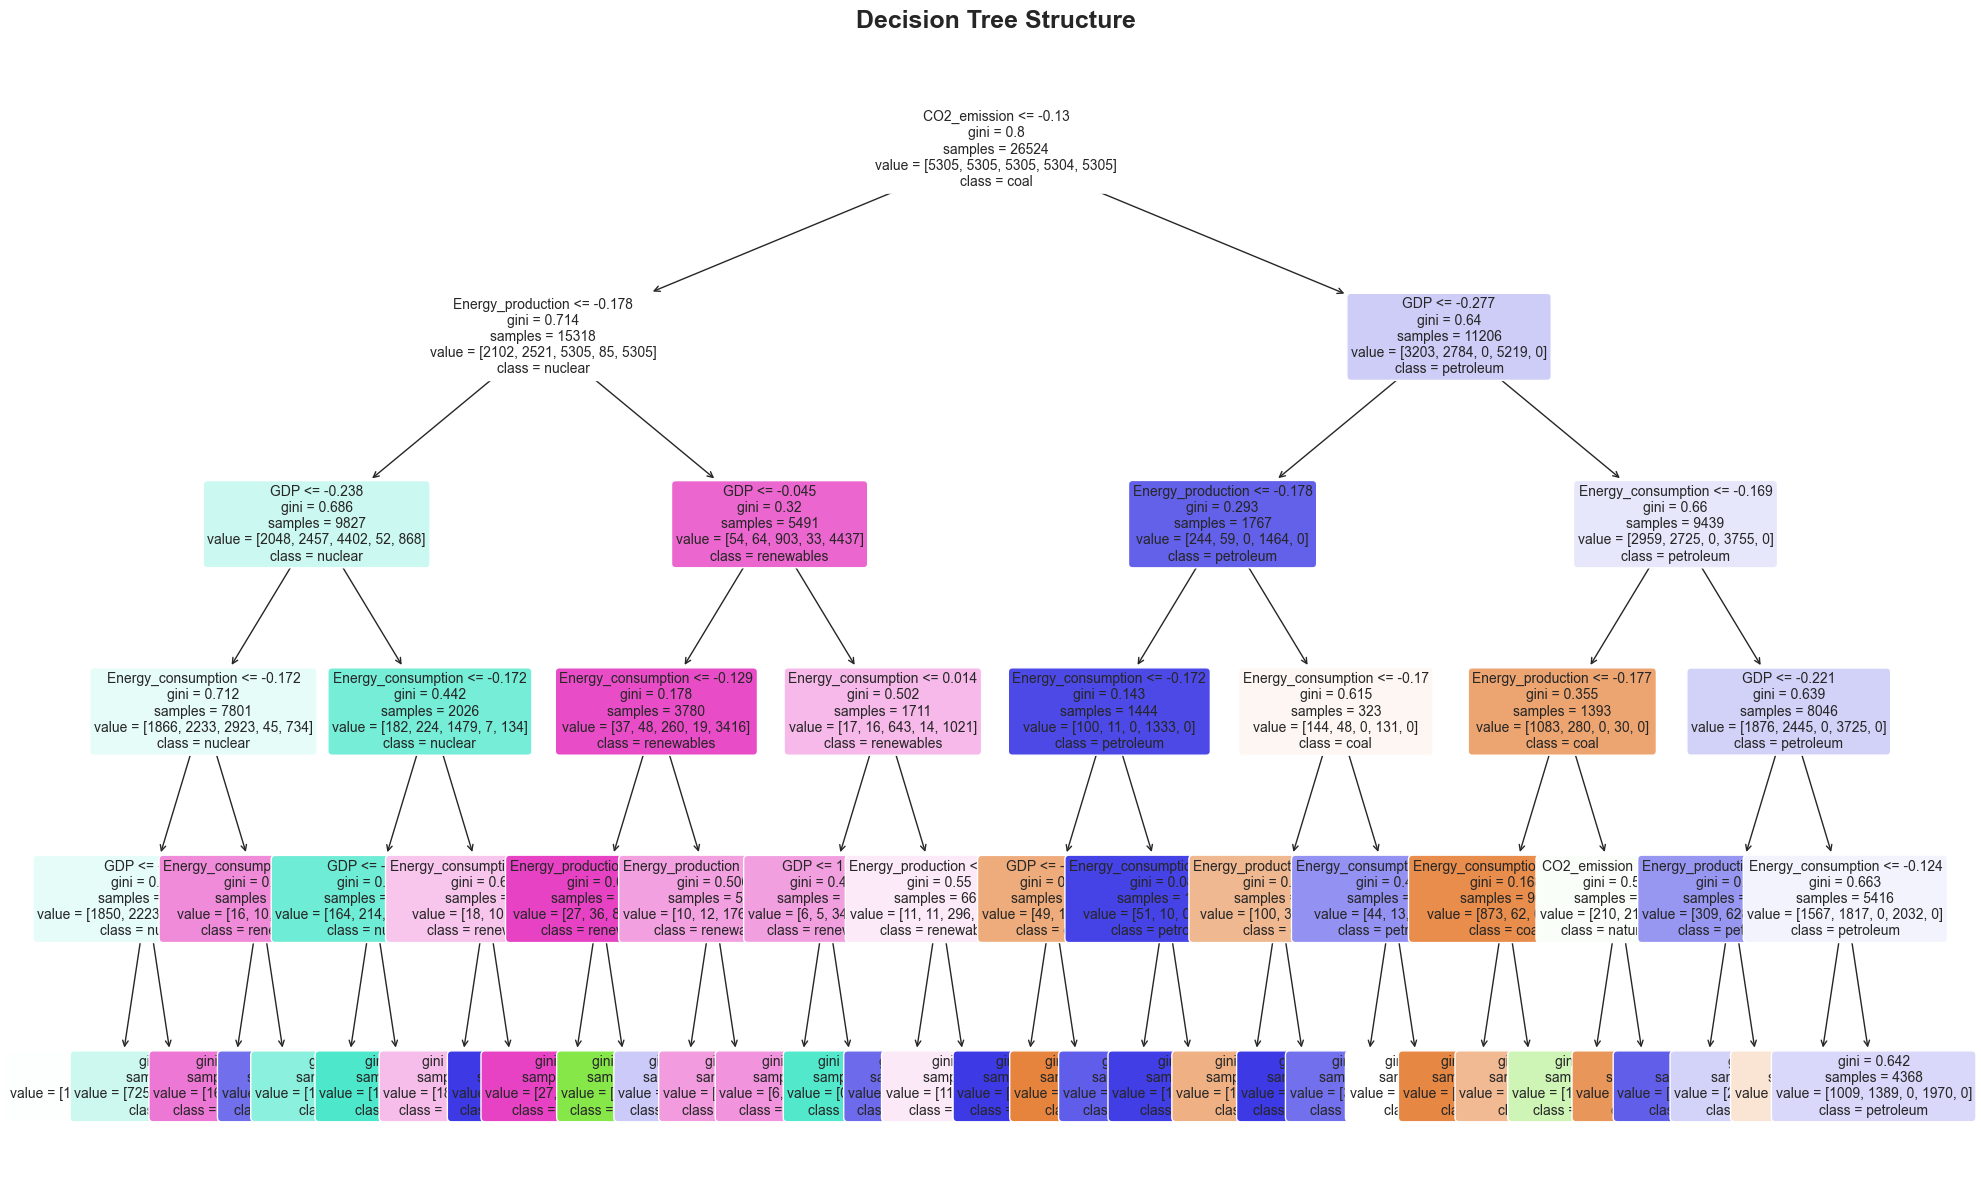


💡 Each node shows: decision rule, samples, value distribution, and predicted class.


In [19]:
# Visualise Decision Tree structure
plt.figure(figsize=(20, 12))
plot_tree(dt_model, feature_names=X_class.columns, class_names=le.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Each node shows: decision rule, samples, value distribution, and predicted class.")

## 5. Model Comparison and Summary

In [20]:
# Create summary table
summary_data = {
    'Model': ['Linear Regression', 'K-Means Clustering', 'Decision Tree'],
    'Type': ['Supervised (Regression)', 'Unsupervised (Clustering)', 'Supervised (Classification)'],
    'Task': ['Predict Energy Consumption', 'Group Countries', 'Classify Energy Category'],
    'Performance Metric': [f'R² = {test_r2:.4f}', f'Silhouette = {silhouette_avg:.4f}', 
                          f'Accuracy = {test_accuracy:.4f}'],
    'Key Insight': [
        f'GDP, Population, Year explain {test_r2*100:.1f}% of variance',
        f'{optimal_k} distinct country groups identified',
        f'{test_accuracy*100:.1f}% accurate energy category prediction'
    ]
}

summary_df = pd.DataFrame(summary_data)

print("=" * 80)
print("MACHINE LEARNING MODELS SUMMARY")
print("=" * 80)
print("\n", summary_df.to_string(index=False))
print("\n" + "=" * 80)

MACHINE LEARNING MODELS SUMMARY

              Model                        Type                       Task  Performance Metric                                     Key Insight
 Linear Regression     Supervised (Regression) Predict Energy Consumption         R² = 0.4774 GDP, Population, Year explain 47.7% of variance
K-Means Clustering   Unsupervised (Clustering)            Group Countries Silhouette = 0.8454            4 distinct country groups identified
     Decision Tree Supervised (Classification)   Classify Energy Category   Accuracy = 0.6093       60.9% accurate energy category prediction

